In [40]:
import pandas as pd
import os

filepath = "C:/Users/gator/Documents/==CNA/CNA_Hackathon_2019_Data"
filename = "2015_hackathon_v1.1.2.hdf"

df = pd.read_hdf("C:/Users/gator/Documents/==CNA/CNA_Hackathon_2019_Data/2015_hackathon_v1.1.2.hdf", key="tracks")

#df = pd.read_hdf5(os.path.join(filepath, filename))

#df = df.head(10000000).copy()

In [41]:
superclass = {
    1024: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 89: 1, 1019: 2, 36: 2, 37: 2,
    1001: 3, 30: 3, 70: 4, 71: 4, 72: 4, 73: 4, 74: 4, 75: 4, 77: 4, 79: 4,
    1003: 4, 1004: 4}
#1 = tanker
#2 = rec
#3 = fishing
#4 = cargo

df['SuperClass'] = (df
                    ["VesselType"]
                    .apply(lambda x: superclass.get(x, 5))
                    )

In [42]:
df = df[df['SuperClass'] != 5]

In [43]:
# Speed: Speed mean, speed median, speed standard deviation,

# Distance: LAT LON

import numpy as np

df["LAT_cd"] = (df
                .groupby(["MMSI", "track_num"])
                ["LAT"]
                .diff()
                .apply(lambda x: x ** 2)
                .fillna(0)
                )

df["LON_cd"] = (df
                .groupby(["MMSI", "track_num"])
                ["LON"]
                .diff()
                .apply(lambda x: x ** 2)
                .fillna(0)
                )

df["distance"] = df["LAT_cd"] + df["LON_cd"]

df["distance"] = df["distance"].apply(np.sqrt)

df["cumulative_distance"] = (df
                             # (df
                             .groupby(["MMSI", "track_num"])
                             ["distance"]
                             .cumsum()
                             )

#df["cumulative_distance"] = (df
# (df
#          .groupby(["MMSI", "track_num"])
#          ["cumulative_distance"]
#          .last()
#          #.to_frame()
#         )

In [ ]:
df

In [44]:
def fillnan511(x):
    if x == 511:
        return np.nan
    else:
        return x

def modheading(x):
    return np.abs(x) % 360

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
MMSI                   1000000 non-null int64
track_num              1000000 non-null int64
BaseDateTime           1000000 non-null datetime64[ns]
LAT                    1000000 non-null float64
LON                    1000000 non-null float64
SOG                    1000000 non-null float64
COG                    1000000 non-null float64
Heading                1000000 non-null float64
VesselType             1000000 non-null int16
Status                 1000000 non-null int8
Length                 933889 non-null float64
Width                  933889 non-null float64
Draft                  933889 non-null float64
Cargo                  1000000 non-null int16
interpolated           1000000 non-null bool
LAT_6hour              725327 non-null float64
LON_6hour              725327 non-null float64
SuperClass             1000000 non-null int64
LAT_cd                 1000000 non-nul

In [45]:
df["Heading"] = df["Heading"].apply(fillnan511)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
MMSI                   1000000 non-null int64
track_num              1000000 non-null int64
BaseDateTime           1000000 non-null datetime64[ns]
LAT                    1000000 non-null float64
LON                    1000000 non-null float64
SOG                    1000000 non-null float64
COG                    1000000 non-null float64
Heading                597184 non-null float64
VesselType             1000000 non-null int16
Status                 1000000 non-null int8
Length                 933889 non-null float64
Width                  933889 non-null float64
Draft                  933889 non-null float64
Cargo                  1000000 non-null int16
interpolated           1000000 non-null bool
LAT_6hour              725327 non-null float64
LON_6hour              725327 non-null float64
SuperClass             1000000 non-null int64
LAT_cd                 1000000 non-null

In [46]:
df["Heading"] = df.groupby(["MMSI", "track_num"])["Heading"].ffill()

In [47]:
df["Heading"] = df["Heading"].fillna(0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
MMSI                   1000000 non-null int64
track_num              1000000 non-null int64
BaseDateTime           1000000 non-null datetime64[ns]
LAT                    1000000 non-null float64
LON                    1000000 non-null float64
SOG                    1000000 non-null float64
COG                    1000000 non-null float64
Heading                1000000 non-null float64
VesselType             1000000 non-null int16
Status                 1000000 non-null int8
Length                 933889 non-null float64
Width                  933889 non-null float64
Draft                  933889 non-null float64
Cargo                  1000000 non-null int16
interpolated           1000000 non-null bool
LAT_6hour              725327 non-null float64
LON_6hour              725327 non-null float64
SuperClass             1000000 non-null int64
LAT_cd                 1000000 non-nul

In [48]:
df["cumulative_heading"] = (df
                            # (df
                            .groupby(["MMSI", "track_num"])
                            ["Heading"]
                            .diff()
                            .apply(modheading)
                            # .groupby(["MMSI", "track_num"])
                            # .isna()
                            # .sum()
                            )

df["cumulative_heading"] = (df
                            .groupby(["MMSI", "track_num"])
                            ["cumulative_heading"]
                            .cumsum()
                            )

# df["heading_cumulative"] = (df
#     .groupby(["MMSI", "track_num"])
#     ["Heading"]
#     .diff()
#     .apply(modheading)
# )


# .agg({"column": [function1, function2, np.abs]})

# from scipy import stats

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 23 columns):
MMSI                   1000000 non-null int64
track_num              1000000 non-null int64
BaseDateTime           1000000 non-null datetime64[ns]
LAT                    1000000 non-null float64
LON                    1000000 non-null float64
SOG                    1000000 non-null float64
COG                    1000000 non-null float64
Heading                1000000 non-null float64
VesselType             1000000 non-null int16
Status                 1000000 non-null int8
Length                 933889 non-null float64
Width                  933889 non-null float64
Draft                  933889 non-null float64
Cargo                  1000000 non-null int16
interpolated           1000000 non-null bool
LAT_6hour              725327 non-null float64
LON_6hour              725327 non-null float64
SuperClass             1000000 non-null int64
LAT_cd                 1000000 non-nul

In [49]:
df_speed_mean = (df
    .groupby(["MMSI", "track_num"])
    .agg({
    "cumulative_distance": ["last"],
    "cumulative_heading": ["last"],
    "SOG": ["mean", "median", "std"],
    "Status": [lambda x: x.value_counts().index[0]],
    "Length": [lambda x: np.nanmax(x)],
    "Width": [lambda x: np.nanmax(x)],
    "Draft": [lambda x: np.nanmax(x)],
    "SuperClass": [lambda x: x.value_counts().index[0]],
}))

# runtime warnings - 3x "All-NaN axis encountered"

In [50]:
# TODO: drop superclass = 5

dfs = df_speed_mean

cols = [
    "cumulative_distance",
    "cumulative_heading",
    "SOG_mean",
    "SOG_median",
    "SOG_std",
    "Status",
    "Length",
    "Width",
    "Draft",
    "SuperClass",
]

dfs.columns = cols

In [23]:
dfs.head()

cumulative_distance  cumulative_heading   SOG_mean  \
MMSI  track_num                                                       
0     0                     9.918148              1336.0   8.917166   
1     0                     0.157133                 0.0   4.907692   
3011  0                     0.000274                 0.0   0.000000   
      1                     0.000428                 0.0   0.000000   
38111 0                     0.503139                 0.0  10.678125   

                 SOG_median   SOG_std  Status  Length  Width  Draft  \
MMSI  track_num                                                       
0     0                 9.4  1.621124       0    20.0    4.0    3.0   
1     0                 4.5  4.179805       0     0.0    0.0    0.0   
3011  0                 0.0  0.000000       0     0.0    0.0    1.5   
      1                 0.0  0.000000       0     0.0    0.0    1.5   
38111 0                11.2  9.768435      -1     NaN    NaN    NaN   

                 SuperClass  
MMSI  track_num              
0     0                   5  
1     0                   5  
3011  0                   5  
      1                   5  
38111 0                   5

In [24]:
dfs = dfs[dfs.SuperClass != 5]

In [25]:
dfs.head()

cumulative_distance  cumulative_heading  SOG_mean  \
MMSI   track_num                                                      
527918 0                     2.662621                 0.0  1.189537   
       1                     2.229054                 0.0  8.055952   
       2                     0.018335                 0.0  0.279167   
       3                     0.028191                 0.0  0.388136   
       4                     0.036418                 0.0  0.020307   

                  SOG_median   SOG_std  Status  Length  Width  Draft  \
MMSI   track_num                                                       
527918 0                 0.0  2.739407      -1    20.0    7.0    0.0   
       1                 9.8  3.638651      -1    20.0    7.0    0.0   
       2                 0.0  0.680412      -1    20.0    7.0    0.0   
       3                 0.0  1.179141      -1    20.0    7.0    0.0   
       4                 0.0  0.282021      -1    20.0    7.0    0.0   

                  SuperClass  
MMSI   track_num              
527918 0                   3  
       1                   3  
       2                   3  
       3                   3  
       4                   3

In [59]:
dfs['norm_heading'] = (dfs['cumulative_heading'] / dfs['cumulative_distance']).replace([np.inf, -np.inf], np.nan).fillna(0)

In [60]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 92366 entries, (527918, 0) to (725001321, 1)
Data columns (total 11 columns):
cumulative_distance    92366 non-null float64
cumulative_heading     92366 non-null float64
SOG_mean               92366 non-null float64
SOG_median             92366 non-null float64
SOG_std                92366 non-null float64
Status                 92366 non-null int8
Length                 92366 non-null float64
Width                  92366 non-null float64
Draft                  92366 non-null float64
SuperClass             92366 non-null int64
norm_heading           92366 non-null float64
dtypes: float64(9), int64(1), int8(1)
memory usage: 7.6 MB


In [55]:
dfs.head()

cumulative_distance  cumulative_heading  SOG_mean  \
MMSI   track_num                                                      
527918 0                     2.662621                 0.0  1.189537   
       1                     2.229054                 0.0  8.055952   
       2                     0.018335                 0.0  0.279167   
       3                     0.028191                 0.0  0.388136   
       4                     0.036418                 0.0  0.020307   

                  SOG_median   SOG_std  Status  Length  Width  Draft  \
MMSI   track_num                                                       
527918 0                 0.0  2.739407      -1    20.0    7.0    0.0   
       1                 9.8  3.638651      -1    20.0    7.0    0.0   
       2                 0.0  0.680412      -1    20.0    7.0    0.0   
       3                 0.0  1.179141      -1    20.0    7.0    0.0   
       4                 0.0  0.282021      -1    20.0    7.0    0.0   

                  SuperClass  norm_heading  
MMSI   track_num                            
527918 0                   3           0.0  
       1                   3           0.0  
       2                   3           0.0  
       3                   3           0.0  
       4                   3           0.0

In [61]:
dfs.to_csv("ready_to_model.csv")

distance
heading
Speed Mean
speed median
speed var
norm heading
Status
Len
Wid
Draft
Class


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025DDDF81C88>],
      dtype=object)

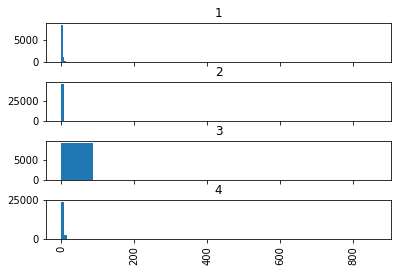

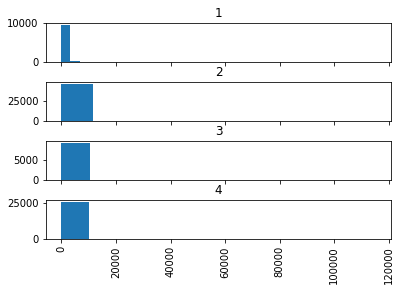

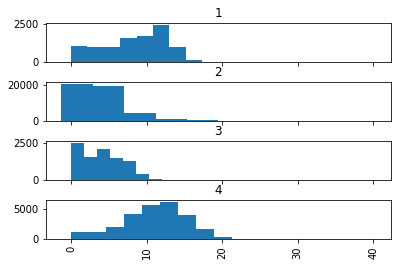

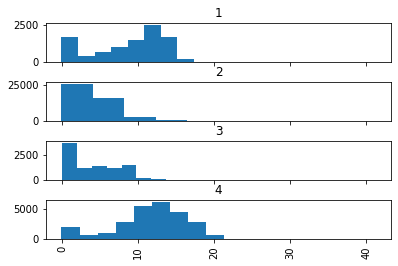

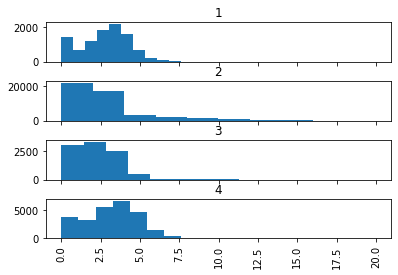

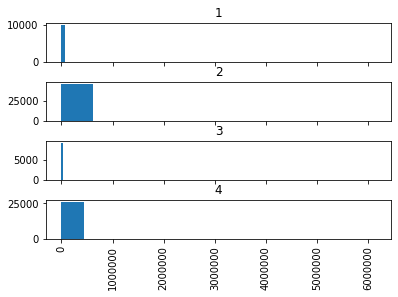

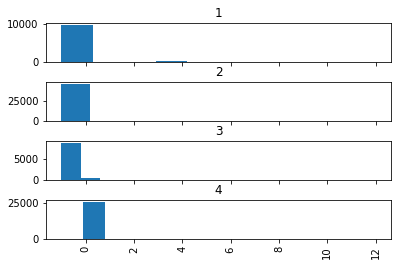

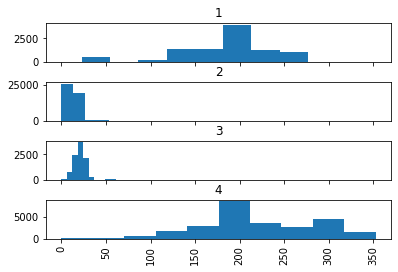

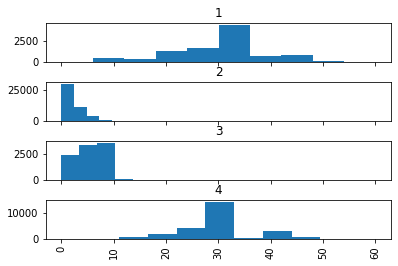

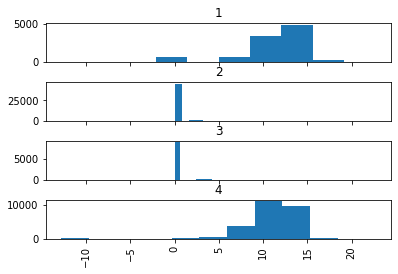

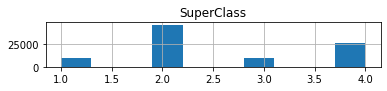

In [62]:
import matplotlib.pyplot as plt

print("distance")
dfs.hist(column='cumulative_distance', by='SuperClass', layout=(4,1), sharex=True)
print("heading")
dfs.hist(column='cumulative_heading', by='SuperClass', layout=(4,1), sharex=True)
print("Speed Mean")
dfs.hist(column='SOG_mean', by='SuperClass', layout=(4,1), sharex=True)
print("speed median")
dfs.hist(column='SOG_median', by='SuperClass', layout=(4,1), sharex=True)
print("speed var")
dfs.hist(column='SOG_std', by='SuperClass', layout=(4,1), sharex=True)
print("norm heading")
dfs.hist(column='norm_heading', by='SuperClass', layout=(4,1), sharex=True)
print("Status")
dfs.hist(column='Status', by='SuperClass', layout=(4,1), sharex=True)
print("Len")
dfs.hist(column='Length', by='SuperClass', layout=(4,1), sharex=True)
print("Wid")
dfs.hist(column='Width', by='SuperClass', layout=(4,1), sharex=True)
print("Draft")
dfs.hist(column='Draft', by='SuperClass', layout=(4,1), sharex=True)
print("Class")
dfs.hist(column='SuperClass', layout=(4,1), sharex=True)